In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Input,Dense,Conv2D
from tensorflow.keras.models import Model,Sequential

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-05-06 22:32:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   169MB/s    in 0.6s    

2023-05-06 22:32:18 (169 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
#unzip

zip_ref = zipfile.ZipFile('pizza_steak.zip') 
zip_ref.extractall()
zip_ref.close()

In [9]:
!ls pizza_steak

test  train


In [10]:
!ls pizza_steak/train/

pizza  steak


In [13]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 0 directories and 250 images in pizza_steak/test/steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 0 directories and 750 images in pizza_steak/train/steak


In [17]:
n_steak_images_tr = len(os.listdir('pizza_steak/train/steak'))
n_steak_images_tr

750

In [6]:
import pathlib
#Get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
list(data_dir.glob('*'))[0].name

In [7]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [18]:
def view_random_image(target_dir,target_class):
  target_folder = target_dir+'/'+target_class
  print(target_folder)

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(random_image[0])
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'image shape ;{img.shape}')
  return img

pizza_steak/train/steak
['168775.jpg']
168775.jpg
image shape ;(512, 341, 3)


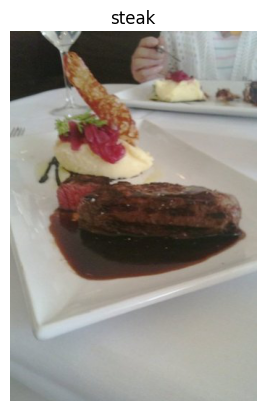

In [19]:
img = view_random_image(target_dir = 'pizza_steak/train',target_class = 'steak')

In [60]:
img.shape

(512, 512, 3)

In [63]:
print(img.dtype)   #uint8
print(tf.constant(img).dtype)

uint8
<dtype: 'uint8'>


In [9]:
#get all pixels values between 0 and 1
img = img/255.0
img

NameError: ignored

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPool2D,Flatten



In [11]:

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
#setup path to our directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed =42)
test_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed =42)

#Build a CNN model

model_1 = Sequential()
model_1.add(Conv2D(filters = 10,kernel_size = 3,activation ='relu' ,input_shape=(224,224,3),name='1st conv'))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D(pool_size= 2))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D(2))
model_1.add(Flatten())
model_1.add(Dense(1,activation = 'sigmoid'))


model_1.compile(loss = 'binary_crossentropy' ,optimizer ='adam' ,metrics=['accuracy'])
history = model_1.fit(train_data,epochs=5,validation_data=(test_data),steps_per_epoch = len(train_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 284ms/step - loss: 0.5818 - accuracy: 0.6827 - val_loss: 0.4459 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4181 - accuracy: 0.8113 - val_loss: 0.3386 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3653 - accuracy: 0.8420 - val_loss: 0.3208 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3494 - accuracy: 0.8547 - val_loss: 0.3355 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.2739 - accuracy: 0.8907 - val_loss: 0.2998 - val_accuracy: 0.8860


In [15]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
#(n*m*l+1)*k 
#n*m = filter size
#l = n_inp filetrs
#k = n_out filters

pizza_steak/train/steak
['183995.jpg']
183995.jpg
image shape ;(384, 512, 3)
pizza_steak/train/pizza
['662526.jpg']
662526.jpg
image shape ;(512, 512, 3)


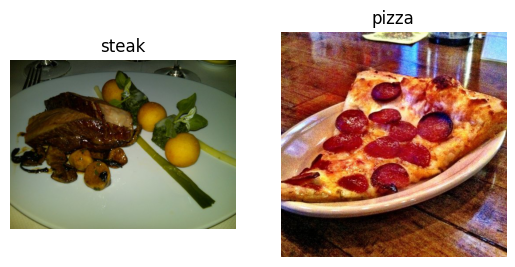

In [20]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

#Preprocess the data

In [21]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='binary',batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images,label = train_data.next()
images.shape

(32, 224, 224, 3)

#3. Create a model (start with a baseline)

In [29]:
model_4 = Sequential()
model_4.add(Conv2D(filters=10,kernel_size = 3,input_shape=(224,224,3),activation='relu'))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1,activation='sigmoid'))
model_4.summary()
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 280ms/step - loss: 1.3704 - accuracy: 0.6427 - val_loss: 0.5083 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 12s 267ms/step - loss: 0.4872 - accuracy: 0.7780 - val_loss: 0.5225 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4091 - accuracy: 0.8260 - val_loss: 0.3963 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 11s 222ms/step - loss: 0.2729 - accuracy: 0.8947 - val_loss: 0.3992 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.1218 - accuracy: 0.9667 - val_loss: 0.4519 - val_accuracy: 0.8020


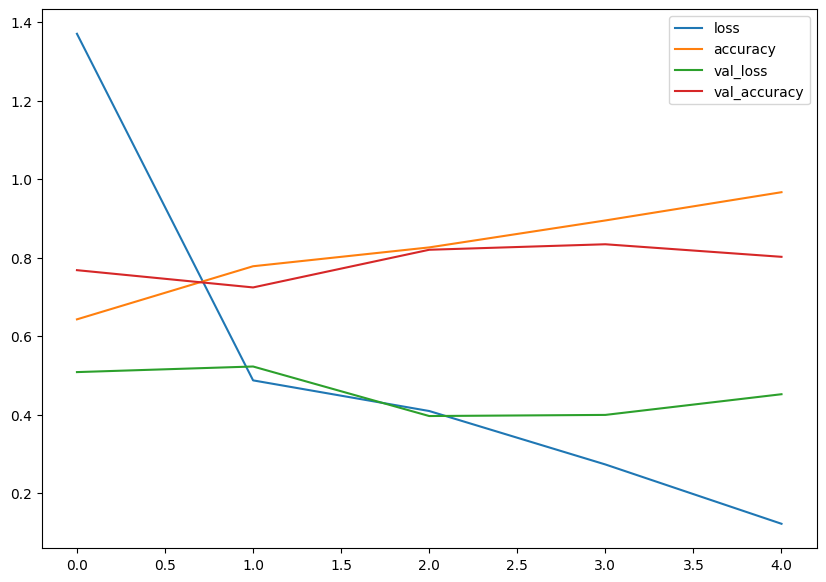

In [31]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));
     

In [ ]:
#seems our data is overfittng

In [33]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [32]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
          

Epoch 1/5
47/47 [==============================] - 13s 233ms/step - loss: 0.6193 - accuracy: 0.6393 - val_loss: 0.4879 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 12s 255ms/step - loss: 0.4725 - accuracy: 0.7867 - val_loss: 0.3868 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4110 - accuracy: 0.8233 - val_loss: 0.3589 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3901 - accuracy: 0.8300 - val_loss: 0.3183 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3507 - accuracy: 0.8500 - val_loss: 0.3589 - val_accuracy: 0.8300


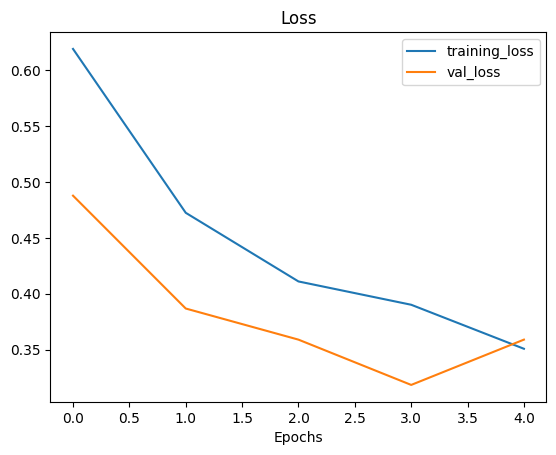

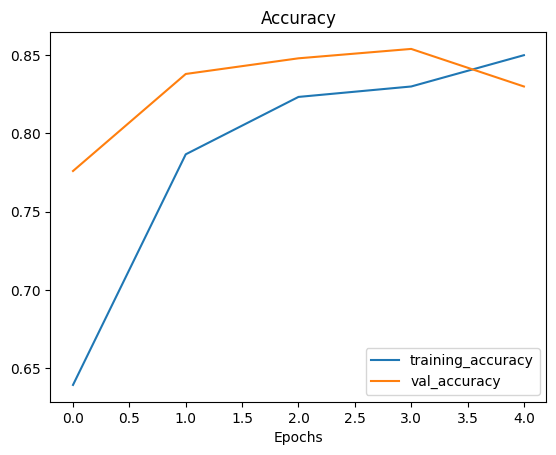

In [36]:
plot_loss_curves(history_5)
     

# Check out the model architecture


#Data Augumentation

In [39]:
train_datagen_augument = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range =20,
                                            shear_range=0.3,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

In [47]:
train_data_ag = train_datagen_augument.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode ='binary',
                                                        shuffle = False)


Found 1500 images belonging to 2 classes.


In [49]:
ag_image,ag_label = train_data_ag.next()

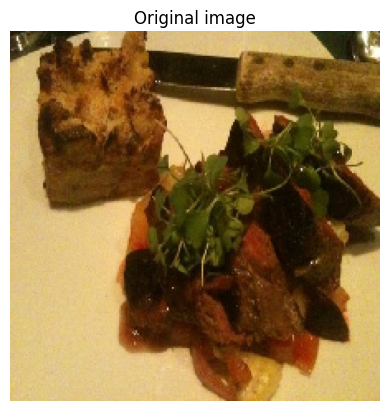

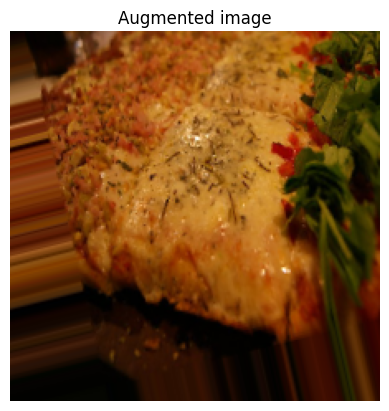

In [51]:
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(ag_image[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [52]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
# Fit the model
history_6 = model_6.fit(train_data_ag,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
          

Epoch 1/5
47/47 [==============================] - 26s 509ms/step - loss: 0.7255 - accuracy: 0.4260 - val_loss: 0.6801 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6985 - accuracy: 0.4980 - val_loss: 0.6823 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6960 - accuracy: 0.5667 - val_loss: 0.6710 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6632 - accuracy: 0.5560 - val_loss: 0.5793 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6433 - accuracy: 0.6300 - val_loss: 0.5550 - val_accuracy: 0.6600


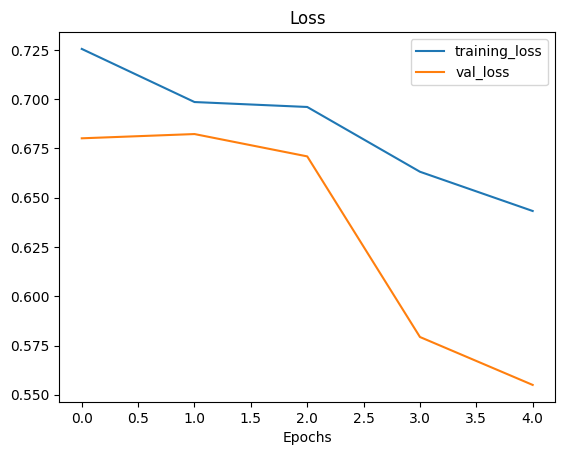

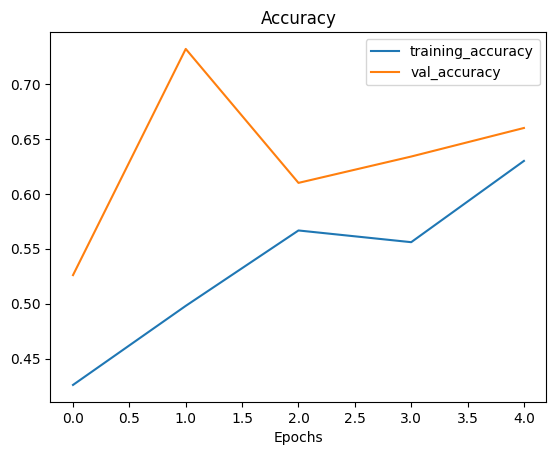

In [53]:
plot_loss_curves(history_6)

#Prediction

--2023-05-06 23:57:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-05-06 23:57:09 (33.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



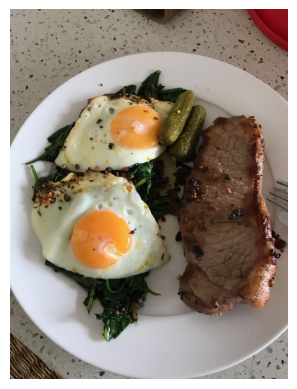

In [54]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [55]:
steak.shape

(4032, 3024, 3)

In [68]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

steak = load_and_prep_image("03-steak.jpeg")
steak
     

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [69]:
model_6.predict(steak)

ValueError: ignored

In [85]:
#since our images are in batches making 32,224,224,3 and prediction is 224,224,3
#we need to expand our dimensions

class_names[int(np.round(model_6.predict(tf.expand_dims(steak,axis=0)))[0][0])]

1/1 [==============================] - 0s 28ms/step


'steak'